<a href="https://colab.research.google.com/github/Elians001/proyecto_ventas/blob/main/eliassalazar_tareamodulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Datos evaluacion ECG – Módulo 3

Desarrollo completo de la evaluación individual que se solicita. Analizar y visualizar datos médicos con Python. Se utilizó el conjunto de datos **ECG Heartbeat Categorization Dataset**, específicamente el archivo `mitbih_train.csv`.


In [5]:
import pandas as pd

# primero se debe cargar el archivo que estaba en el link de descarga.
df = pd.read_csv("mitbih_train.csv", header=None)
df.rename(columns={187: "clase"}, inplace=True)

# obtener una vista previa
print("Tamaño del dataset:", df.shape)
df.head()


Tamaño del dataset: (87554, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,clase
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploración de la informacion contenida en el Dataset

Se verifican columnas, tipos de datos, y valores nulos. Además se documenta el significado de los datos: cada fila representa un latido de ECG discretizado en 187 puntos, y la columna 'clase' representa su categoría (de 0 a 4).


In [4]:
estructura = {
    "columnas": df.columns.tolist(),
    "forma": df.shape,
    "tipos_de_datos": df.dtypes.to_dict(),
    "valores_nulos": df.isnull().sum().sum()
}
estructura


{'columnas': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,

In [6]:
df["clase"].value_counts().sort_index()


,count
clase,
0.0,72471
1.0,2223
2.0,5788
3.0,641
4.0,6431


## Preprocesamiento

No se detectaron valores nulos, por lo que no se requiere limpieza. Se aplica **estandarización (Z-score)** usando `StandardScaler`, para poder comparar señales normalizadas.


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
señales = df.iloc[:, :-1]
señales_normalizadas = scaler.fit_transform(señales)

df_normalizado = pd.DataFrame(señales_normalizadas)
df_normalizado["clase"] = df["clase"].values
df_normalizado.head()


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,clase
0,0.363548,0.758797,1.132406,0.125650,-0.263843,-0.111820,-0.301699,-0.654419,-0.814241,-0.877525,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,0.0
1,0.289547,0.473768,0.165269,-0.108870,-0.604947,-0.494702,-0.594425,-0.640117,-0.725460,-0.677940,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,0.0
2,0.455113,-0.444975,-1.044794,-0.719430,-0.739067,-0.878027,-0.835114,-0.894440,-0.842006,-0.895782,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,0.0
3,0.145511,-0.416634,0.516772,0.276198,-0.028208,-0.773968,-0.750699,-0.795532,-0.770726,-0.824118,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,0.0
4,0.318696,1.090291,1.790615,1.777627,0.879270,0.223533,-0.337675,-0.635136,-0.473407,-0.276330,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,0.0


## Análisis Estadístico

Se generan estadísticas descriptivas para las columnas de la señal ECG.


In [9]:
df.describe()


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,clase
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


## Visualización de los Datos


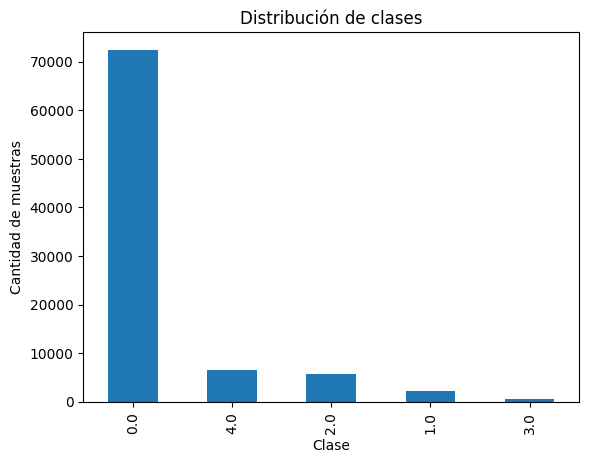

In [10]:
import matplotlib.pyplot as plt
df["clase"].value_counts().plot(kind="bar")
plt.title("Distribución de clases")
plt.xlabel("Clase")
plt.ylabel("Cantidad de muestras")
plt.show()


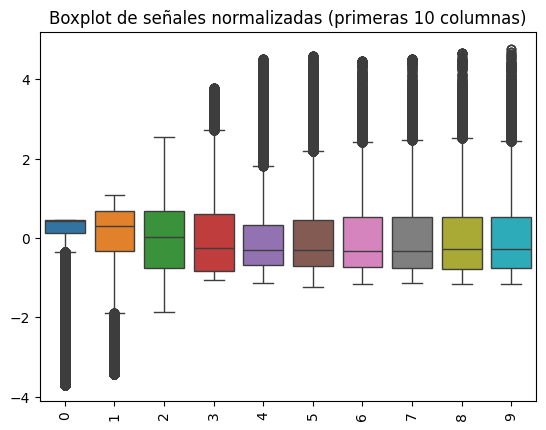

In [11]:
import seaborn as sns
sns.boxplot(data=df_normalizado.iloc[:, :10])
plt.title("Boxplot de señales normalizadas (primeras 10 columnas)")
plt.xticks(rotation=90)
plt.show()


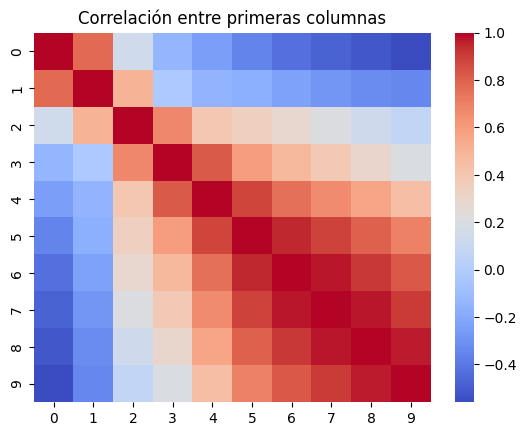

In [12]:
correlacion = df.iloc[:, :-1].corr().iloc[:10, :10]
sns.heatmap(correlacion, cmap="coolwarm")
plt.title("Correlación entre primeras columnas")
plt.show()


## Conclusión

Este análisis permitió comprender la estructura y naturaleza de las señales cardíacas discretizadas en el dataset MIT-BIH. Se aplicó un preprocesamiento adecuado, y se realizaron visualizaciones y estadísticas descriptivas relevantes según los criterios de evaluación.
